# ANLY590 - Assignment 3
##  Group: Zhe Zhou, Jiaxuan Sun, Jen Wang

<br>

## 1. AutoEncoder

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout,Activation,Flatten,AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv2D,MaxPooling2D, ZeroPadding2D, AveragePooling2D, Conv1D, MaxPooling1D
from tensorflow.keras import Sequential

In [2]:
## Load data

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = tf.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = tf.reshape(x_test, (len(x_test), 28, 28, 1))




In [3]:
### Build Model


model = Sequential()
# here's the encoder part
model.add(Conv2D(20, (3, 3), activation='relu', 
                 padding='same',
                 input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(AveragePooling2D((2, 2)))

model.add(Conv2D(40, (3, 3), activation='relu', 
                 padding='same'))
model.add(Dropout(0.1))
model.add(AveragePooling2D((2, 2)))


# the decoder part
model.add(Conv2D(20, (3, 3), activation='relu', 
                 padding='same',
                 input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(40, (3, 3), activation='relu', 
                 padding='same'))
model.add(Dropout(0.1))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', 
                 padding='same'))


In [7]:
### Compile and run the model

model.compile(optimizer='adam', loss='mse')
model.fit(x_train, x_train,
                epochs=10,
                batch_size=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0056 - val_loss: 0.0047
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0055 - val_loss: 0.0046
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0055 - val_loss: 0.0041
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0055 - val_loss: 0.0045
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0054 - val_loss: 0.0044
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0054 - val_loss: 0.0041
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0054 - val_loss: 0.0043
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0054 - val_loss: 0.0046
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0054 - val_

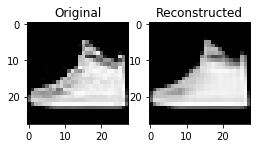

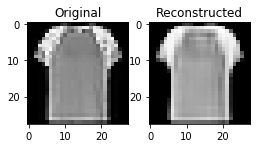

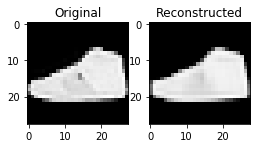

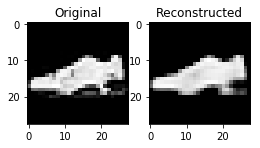

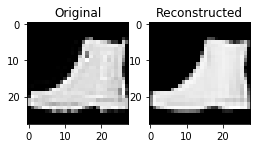

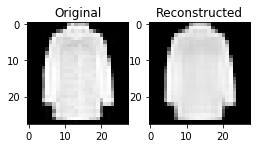

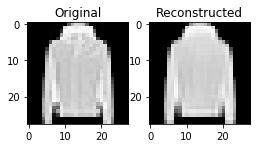

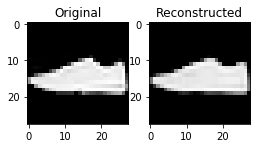

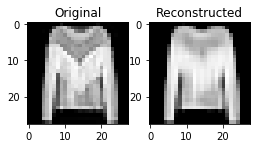

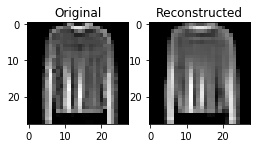

In [8]:
### visualize some examples of input images and their decoded reconstruction.


import matplotlib.pyplot as plt
from tensorflow import reshape
%matplotlib inline
import random

# random sample 
samp = random.sample(range(1, 60000), 10)
indices = tf.constant(samp)
selected = tf.gather(x_train, indices)
# random sample from the training set
preds = model.predict(selected)
# see how it did by plotting the original and reconstructed image
for x in range(len(preds)):
    plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(reshape(x_train[samp[x]],[28, 28]),cmap='Greys_r')
    plt.subplot(1, 2, 2)
    plt.title('Reconstructed')
    plt.imshow(reshape(preds[x],[28, 28]),cmap='Greys_r')

<br>

## 2.1 Deep CNN

<br>

We trained a deep CNN model with three convolutional layers, each convolutional layer is followed by a down-sampled Max Pooling layer. The last Maxpooling layer is followed by a Flatten layer, then two Dense layers.



In [9]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = tf.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = tf.reshape(x_test, (len(x_test), 28, 28, 1))
y_train = y_train.reshape((60000,1))
y_test = y_test.reshape((10000,1))

In [10]:
from tensorflow.keras import layers

model = Sequential()
# here's the encoder part
model.add(Conv2D(32, (3, 3), activation='relu', 
                 padding='same',
                 input_shape=(28,28,1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', 
                 padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train,
                epochs=15,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4879 - accuracy: 0.8248 - val_loss: 0.3963 - val_accuracy: 0.8581
Epoch 2/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3078 - accuracy: 0.8876 - val_loss: 0.3035 - val_accuracy: 0.8878
Epoch 3/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2636 - accuracy: 0.9042 - val_loss: 0.2766 - val_accuracy: 0.9009
Epoch 4/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2376 - accuracy: 0.9129 - val_loss: 0.2717 - val_accuracy: 0.8998
Epoch 5/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2143 - accuracy: 0.9216 - val_loss: 0.2519 - val_accuracy: 0.9110
Epoch 6/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1956 - accuracy: 0.9287 - val_loss: 0.2486 - val_accuracy: 0.9108
Epoch 7/15
60000/60000 [==============================] 

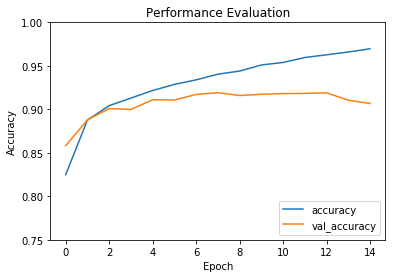

10000/1 - 1s - loss: 0.1713 - accuracy: 0.9067


In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Performance Evaluation')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Above is the performance evalueation of the training accuracy and testiing accuracy, as we can see, the final training accuracy is around 96%, the final testing accuracy is around 91%

<br>

## 2.2 Transfer Learning

<br>

we used the VGG16 pre-trained model for this transfer learning task. Since the VGG16 model requires images size of 32 *32, had to write a function to make the images a little larger to fit VGG16's minimum requirements. Additionally, VGG16 requires RGB channel, we had two transfer our original images from grayscale to RGB, basically pad the third chennel with 0s.


In [16]:
#simple image scaling to (nR x nC) size
def scale(im, nR, nC):
    nR0 = len(im)     # source number of rows 
    nC0 = len(im[0])  # source number of columns 
    return [[ im[int(nR0 * r / nR)][int(nC0 * c / nC)]  
             for c in range(nC)] for r in range(nR)]

In [18]:
import numpy as np
# get a new copy of the training and test data
(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.fashion_mnist.load_data()
# modify the data appropriately, as before
x_train1 = x_train1.astype('float32') / 255.
x_test1 = x_test1.astype('float32') / 255.

x_train32 = [ scale(i,32,32) for i in x_train1]
x_train32 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_train32])
x_test32 = [ scale(i,32,32) for i in x_test1]
x_test32 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_test32])


y_train1 = y_train1.reshape((60000,1))
y_test1 = y_test1.reshape((10000,1))



In [19]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

# fit the model
model1 = Sequential()
model1.add(conv_base)
# add our Feature Extractor
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(10, activation="softmax"))

# freeze the base model weights
conv_base.trainable = False
# compile
model1.compile(loss="sparse_categorical_crossentropy", 
              optimizer='adam',
              metrics=['accuracy'])
# fit
history1 = model1.fit(x_train32, y_train1,
          epochs=15,
          batch_size=50,
          shuffle=True,
          validation_data=(x_test32, y_test1))


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 192us/sample - loss: 0.5936 - accuracy: 0.7962 - val_loss: 0.4704 - val_accuracy: 0.8309
Epoch 2/15
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4311 - accuracy: 0.8444 - val_loss: 0.4383 - val_accuracy: 0.8413
Epoch 3/15
60000/60000 [==============================] - 11s 177us/sample - loss: 0.4002 - accuracy: 0.8543 - val_loss: 0.4121 - val_accuracy: 0.8531
Epoch 4/15
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3796 - accuracy: 0.8612 - val_loss: 0.4067 - val_accuracy: 0.8530
Epoch 5/15
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3643 - accuracy: 0.8672 - val_loss: 0.4063 - val_accuracy: 0.8512
Epoch 6/15
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3529 - accuracy: 0.8725 - val_loss: 0.4158 - val_accuracy: 0.8459
Epoch 7/15
60000/60000 [====================

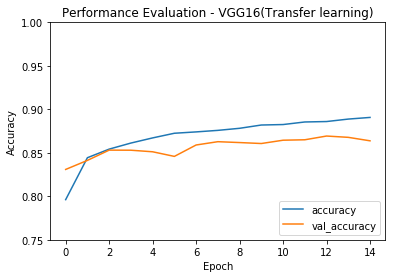

10000/1 - 3s - loss: 0.2815 - accuracy: 0.8638


In [20]:
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Performance Evaluation - VGG16(Transfer learning)')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model1.evaluate(x_test32,  y_test1, verbose=2)

As the perfomeance comparison plot showing above, we have training accuracy around 0.88 and testing accuracy around 0.86. This is actually lower than the simple CNN we trained eariler, this is probably due to the complexity level of this task. VGG16 is a very deep and compelx CNN and it is usually applied to much more complex task. Howevery, the dataset we have is relatively easy, and a simple CNN can already solve the deal. 

<br>

## 3.1 Text Claasification - RNN

<br>

In this task, we built an LSTM model to solve this Task. Since this is a multi-label classification problem, we need to have the response in the one-hot encoding form. Since the response in the dataset is already quite close to one-hot form, what we need to do is to just change those non-zero factional value into 1s. The reason we do this is because we only care if one topic is presented in the text, we do not care how much persentage it processes in the text.

Next we perfomed preprocessing on our text data. We begin with tokenization, stop-words removal, stemming and lemmetization. Second, we applied sequence padding to either pad or chuncate tokens to the max legnth of 40. Third, we train the word2vec model and transform the token squences into word vectors.

Finally, we build and train our LSTM model. We use `binary_crossentropy` loss, and set our last layer with 15 neurons with `sigmoid` activaton function, this set up does the trick very well.

In [21]:
import string
import pandas as pd
import numpy as np
import nltk
import os
import re
import sys
import collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import regex
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout,Activation,Flatten,GlobalMaxPooling1D,LSTM
from tensorflow.keras import Sequential
import tensorflow as tf


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhouz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df = pd.read_csv('tweets_with_labels.csv',sep = '\t')

stopWords = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_tweets(tweet):
    tweet = re.sub("@mention", "",tweet)
    tweet = re.sub("{link}", "",tweet)
    tweet = re.sub("[^A-Za-z]"," ",tweet)
    tweet = re.sub(r'\bRT\b', '', tweet)
    tweet = re.sub("\s+"," ",tweet)
    tokens = word_tokenize(tweet)
    words = [word for word in tokens if word not in stopWords]
    words = [stemmer.stem(w).strip("'") for w in words]
    words = [lemmatizer.lemmatize(w, pos="a") for w in words]
    words = [word for word in words if len(word)!=1]
    final_tweet = ' '.join(words)
    return final_tweet

In [23]:
new_tweet = [preprocess_tweets(x) for x in list(df.tweet)]
df['new_tweet'] = new_tweet
s_wv = [word_tokenize(x) for x in list(df.new_tweet)]


In [24]:
## check bad tweets. some tweet only contains "link" or unnecessary hashtags, after preprocessing, they becomes empty.

ff=[]
for w in s_wv:
    ff.append(len(w))
bad_tweet_index = [n for n,x in enumerate(ff) if x==0]
print(bad_tweet_index)

[13126, 14906, 16609, 20551, 26280, 27638, 30198, 37749, 40658, 44965, 55093, 56302, 57232, 65298, 66361, 70516]


In [25]:
## remove those bad tweets.
print('Shape before: ',df.shape)
df_new=df.drop(bad_tweet_index)
print('Shape now: ', df_new.shape)

Shape before:  (77946, 18)
Shape now:  (77930, 18)


In [26]:
## preprocess finished, now split train and test for target
split_point = int(df_new.shape[0]*0.8)

## target data
df_target = df_new.loc[:,'k1':'k15']
df_target[df_target!=0] = 1

y_train = df_target.loc[:split_point,:].values
y_test = df_target.loc[split_point:,:].values

x_train_temp = list(df_new.loc[:split_point,'new_tweet'])
x_test_temp = list(df_new.loc[split_point:,'new_tweet'])

x_train = [word_tokenize(x) for x in x_train_temp]
x_test = [word_tokenize(x) for x in x_test_temp]


print('Y_train shape: ',y_train.shape)
print('Y_test shape: ',y_test.shape)
print('X_train shape: ',len(x_train))
print('X_test shape: ',len(x_test))

Y_train shape:  (62332, 15)
Y_test shape:  (15599, 15)
X_train shape:  62332
X_test shape:  15599


In [27]:
#### now padding token sequense to max length of 40

x_train_padded = sequence.pad_sequences(x_train, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)
x_test_padded = sequence.pad_sequences(x_test, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)

train_corpus = list(df_new.new_tweet)
train_cor_tk = [word_tokenize(x) for x in train_corpus]

corpus_padded = sequence.pad_sequences(train_cor_tk, maxlen=40,padding="post", truncating="post", value='_pad_',dtype=object)

kkk = corpus_padded.tolist()
x_train_padded = x_train_padded.tolist()
x_test_padded = x_test_padded.tolist()

In [28]:
## train word2vec

w2v_model = Word2Vec(kkk, min_count=1,size = 20,workers=1,window=3)

In [29]:
## Vectorizing training dataset

x_train_vec = np.empty([len(x_train),40, 20])
x_test_vec = np.empty([len(x_test),40, 20])

index = 0
for w in x_train_padded:
    temp = w2v_model[w]
    x_train_vec[index,:,:] = temp
    index = index + 1

index = 0
for w in x_test_padded:
    temp = w2v_model[w]
    x_test_vec[index,:,:] = temp
    index = index + 1


print('Shape of x_train_vec: ', x_train_vec.shape)
print('Shape of x_test_vec: ', x_test_vec.shape)

C:\Users\zhouz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\zhouz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Shape of x_train_vec:  (62332, 40, 20)
Shape of x_test_vec:  (15599, 40, 20)


In [37]:
## Build LSTM model

model_rnn = Sequential()
model_rnn.add(LSTM(128))
model_rnn.add(Dense(128, activation = 'relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(15, activation ='sigmoid'))


model_rnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history2 = model_rnn.fit(x_train_vec, y_train,
                epochs=15,
                batch_size=500,
                validation_data=(x_test_vec, y_test))

Train on 62332 samples, validate on 15599 samples
Epoch 1/15
62332/62332 [==============================] - 3s 53us/sample - loss: 0.3449 - accuracy: 0.8666 - val_loss: 0.3214 - val_accuracy: 0.8745
Epoch 2/15
62332/62332 [==============================] - 1s 21us/sample - loss: 0.3251 - accuracy: 0.8736 - val_loss: 0.3211 - val_accuracy: 0.8745
Epoch 3/15
62332/62332 [==============================] - 1s 21us/sample - loss: 0.3219 - accuracy: 0.8741 - val_loss: 0.3049 - val_accuracy: 0.8745
Epoch 4/15
62332/62332 [==============================] - 1s 21us/sample - loss: 0.2852 - accuracy: 0.8822 - val_loss: 0.2430 - val_accuracy: 0.9038
Epoch 5/15
62332/62332 [==============================] - 1s 22us/sample - loss: 0.2056 - accuracy: 0.9236 - val_loss: 0.1806 - val_accuracy: 0.9345
Epoch 6/15
62332/62332 [==============================] - 1s 21us/sample - loss: 0.1765 - accuracy: 0.9364 - val_loss: 0.1667 - val_accuracy: 0.9396
Epoch 7/15
62332/62332 [==============================] 

Text(0.5, 1.0, 'Text Classification - RNN')

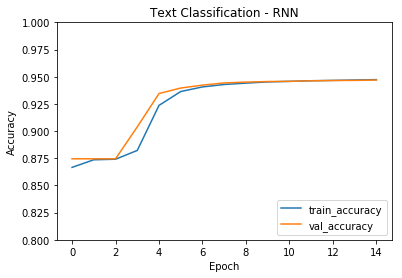

In [49]:
## Performance Evaluation

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Text Classification - RNN')


<br>

## 3.2 Text Claasification - CNN

<br>

We can directly use the preprocessing result from the previous task, and apply 1d-convolution

In [52]:
model = Sequential()
# here's the encoder part
model.add(Conv1D(64, 3,activation='relu', padding = 'valid', strides=1, input_shape=(40,20)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(15, activation ='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history = model.fit(x_train_vec, y_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_vec, y_test))

Train on 62332 samples, validate on 15599 samples
Epoch 1/15
62332/62332 [==============================] - 2s 39us/sample - loss: 0.2485 - accuracy: 0.9058 - val_loss: 0.1787 - val_accuracy: 0.9356
Epoch 2/15
62332/62332 [==============================] - 2s 30us/sample - loss: 0.1823 - accuracy: 0.9356 - val_loss: 0.1671 - val_accuracy: 0.9402
Epoch 3/15
62332/62332 [==============================] - 2s 31us/sample - loss: 0.1724 - accuracy: 0.9393 - val_loss: 0.1623 - val_accuracy: 0.9420
Epoch 4/15
62332/62332 [==============================] - 2s 31us/sample - loss: 0.1674 - accuracy: 0.9413 - val_loss: 0.1586 - val_accuracy: 0.9432
Epoch 5/15
62332/62332 [==============================] - 2s 30us/sample - loss: 0.1639 - accuracy: 0.9423 - val_loss: 0.1566 - val_accuracy: 0.9438
Epoch 6/15
62332/62332 [==============================] - 2s 31us/sample - loss: 0.1609 - accuracy: 0.9430 - val_loss: 0.1552 - val_accuracy: 0.9442
Epoch 7/15
62332/62332 [==============================] 

Text(0.5, 1.0, 'Text Classification - CNN')

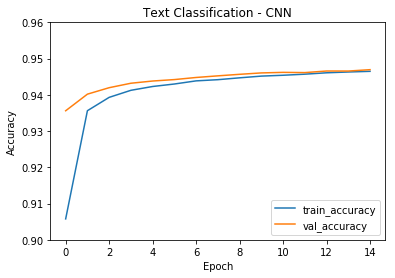

In [54]:
## Performance Evaluation

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 0.96])
plt.legend(loc='lower right')
plt.title('Text Classification - CNN')


<br>

## 3.2 Text Claasification - CNN

<br>

Since this is a multi-label classification label, we are not able to plot ROC curve, insdead we will compare their loss curve. 

Text(0.5, 1.0, 'Text Classification - CNN')

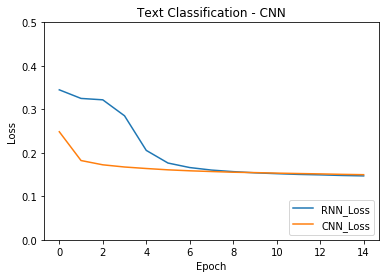

In [55]:
plt.plot(history2.history['loss'], label='RNN_Loss')
plt.plot(history.history['loss'], label = 'CNN_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.legend(loc='lower right')
plt.title('Text Classification - CNN')